# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import tweepy
import os
import json
import time
import re
import warnings
from IPython.display import Image
from functools import reduce

% matplotlib inline

In [2]:
twi_arch_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twi_arch_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_request = requests.get(url, allow_redirects=True)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(img_request.content)

img_pred = pd.read_csv('image-predictions.tsv', sep='\t' )
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
with open('tweet-json.txt', mode='r') as file:
    data = [json.loads(line) for line in file]

twe_json = pd.read_json(json.dumps(data))
twe_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twi_arch_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twi_arch_enhanced['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Daisy          7
Bailey         7
an             7
Buddy          7
Koda           6
Oscar          6
Scout          6
Rusty          6
Leo            6
Jack           6
Bella          6
Dave           6
Jax            6
Milo           6
Stanley        6
Gus            5
            ... 
Kendall        1
Laika          1
Brandi         1
Hazel          1
Lolo           1
Sobe           1
Jimbo          1
Benny          1
Genevieve      1
Samsom         1
Lacy           1
Thor           1
Bertson        1
Bones          1
Lizzie         1
Orion          1
Glacier        1
Skittles       1
Mollie         1
Grizzie        1
Ferg           1
Napolean       1
Stark          1
Sonny          1
Mike           1
Noah           1
Jennifur       1
Cedrick       

In [7]:
twe_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [8]:
img_pred.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
img_pred['jpg_url'].duplicated().sum()

66

In [10]:
img_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [11]:
img_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
malinois                           20
chow                               20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [12]:
img_pred['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

### Quality issues
1. In twi_arch_enhanced, Remove retweet

2. In twi_arch_enhanced, drop useless column

3. In twi_arch_enhanced, Dog names not corrected, there are some value like ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

4. In twe_json, drop useless column

5. In twi_arch_enhanced, the timestamp column must be datetime not string

6. In twi_arch_enhanced, keep only date for 'timestamp' column

7. In img_pred, drop duplicate at 'jpg_url' column

8. In img_pred, 'p1,p2,p3' columns: dog breeds are not consistently lower or uppercase

### Tidiness issues
1. Merge doggo, floofer, pupper, puppo columns

2. Merge 3 datasets into one using inner join according to the tweet_id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
twi_arch_enhanced_clean = twi_arch_enhanced.copy()
img_pred_clean = img_pred.copy()
twe_json_clean = twe_json.copy()

### Issue #1:

#### Define: In twi_arch_enhanced, remove retweet

#### Code

In [14]:
twi_arch_enhanced_clean = twi_arch_enhanced_clean[twi_arch_enhanced_clean['retweeted_status_id'].isnull()]

#### Test

In [15]:
twi_arch_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:

#### Define: In twi_arch_enhanced, drop useless column

#### Code

In [16]:
twi_arch_enhanced_clean = twi_arch_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp', 'retweeted_status_id', 
                                                    'retweeted_status_user_id', 'expanded_urls'], axis=1)

#### Test

In [17]:
twi_arch_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #3:

#### Define: In twi_arch_enhanced, Dog names not corrected, there are some value like ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

#### Code

In [18]:
word = ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

In [19]:
for dog_name in word:
    twi_arch_enhanced_clean.loc[twi_arch_enhanced_clean.name == dog_name, 'name'] = None

#### Test

In [20]:
twi_arch_enhanced_clean['name'].value_counts()

None            680
Charlie          11
Lucy             11
Oliver           10
Cooper           10
Penny             9
Tucker            9
Sadie             8
Winston           8
Lola              8
Daisy             7
Toby              7
Oscar             6
Bailey            6
Bella             6
Bo                6
Stanley           6
Jax               6
Koda              6
Dave              5
Scout             5
Rusty             5
Louis             5
Milo              5
Chester           5
Buddy             5
Bentley           5
Leo               5
Scooter           4
Duke              4
               ... 
Hall              1
Lambeau           1
Jackie            1
Theo              1
Stark             1
Napolean          1
Ferg              1
Genevieve         1
Rizzo             1
Pablo             1
Smiley            1
Jangle            1
Humphrey          1
Birf              1
Alexanderson      1
Bobb              1
Sprinkles         1
Lupe              1
Samsom            1


### Issue #4: 

#### Define: In twe_json, drop useless column

#### Code

In [21]:
twe_json_clean = twe_json_clean.drop(['contributors', 'coordinates', 'geo', 'extended_entities', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted_status'], axis=1)

#### Test

In [22]:
twe_json_clean.columns

Index(['created_at', 'display_text_range', 'entities', 'favorite_count',
       'favorited', 'full_text', 'id', 'id_str', 'is_quote_status', 'lang',
       'retweet_count', 'retweeted', 'source', 'truncated', 'user'],
      dtype='object')

### Issue #5: 

#### Define: In twi_arch_enhanced, the timestamp column must be datetime not string

#### Code

In [23]:
twi_arch_enhanced_clean['timestamp'] = pd.to_datetime(twi_arch_enhanced_clean['timestamp'])

### Test

In [24]:
twi_arch_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2078 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #6: 

#### Define: In twi_arch_enhanced, keep only date for 'timestamp' column

#### Code

In [25]:
twi_arch_enhanced_clean['timestamp'] = twi_arch_enhanced_clean['timestamp'].apply(lambda x: x.date())

### Test

In [26]:
twi_arch_enhanced_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #7: 

#### Define: In img_pred, drop duplicate at 'jpg_url' column

#### Code

In [27]:
img_pred_clean = img_pred_clean.drop_duplicates(['jpg_url'])

#### Test

In [28]:
img_pred_clean['jpg_url'].duplicated().sum()

0

### Issue #8: 

#### Define: In img_pred, 'p1,p2,p3' columns: dog breeds are not consistently lower or uppercase

#### Code

In [29]:
column = ['p1', 'p2', 'p3']
for word in column:
    img_pred_clean[word] = img_pred_clean[word].str.lower()

#### Test

In [30]:
img_pred_clean['p1'].value_counts()

golden_retriever             139
labrador_retriever            95
pembroke                      88
chihuahua                     79
pug                           55
chow                          41
samoyed                       40
toy_poodle                    38
pomeranian                    38
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
siberian_husky                20
german_shepherd               20
web_site                      19
staffordshire_bullterrier     19
maltese_dog                   18
eskimo_dog                    18
shetland_sheepdog             18
teddy                         18
beagle                        17
rottweiler                    17
cardigan                      17
shih-tzu                      17
lakeland_terrier              16
italian_greyhound             16
kuvasz                        16
          

### Issue #9: 

#### Define: Merge doggo, floofer, pupper, puppo columns into 1 column

#### Code

In [31]:
#Change None value to ''
twi_arch_enhanced_clean['doggo'] = twi_arch_enhanced_clean['doggo'].replace(['None'],'')
twi_arch_enhanced_clean['floofer'] = twi_arch_enhanced_clean['floofer'].replace(['None'],'')
twi_arch_enhanced_clean['pupper'] = twi_arch_enhanced_clean['pupper'].replace(['None'],'')
twi_arch_enhanced_clean['puppo'] = twi_arch_enhanced_clean['puppo'].replace(['None'],'')

In [32]:
#Merge columns into 1
twi_arch_enhanced_clean['dog_breed'] = twi_arch_enhanced_clean['doggo'] + twi_arch_enhanced_clean['floofer'] + twi_arch_enhanced_clean['pupper'] + twi_arch_enhanced_clean['puppo']

In [33]:
twi_arch_enhanced_clean['dog_breed'] = twi_arch_enhanced_clean['dog_breed'].replace(['doggopupper','doggopuppo', 'doggofloofer'],['doggo & pupper','doggo & puppo', 'doggo & floofer'])

In [34]:
twi_arch_enhanced_clean = twi_arch_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [35]:
twi_arch_enhanced_clean.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,
5,891087950875897856,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,
6,890971913173991426,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,
7,890729181411237888,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,
8,890609185150312448,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,
9,890240255349198849,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


In [36]:
twi_arch_enhanced_clean['dog_breed'].value_counts()

                   1831
pupper              224
doggo                75
puppo                24
doggo & pupper       10
floofer               9
doggo & floofer       1
doggo & puppo         1
Name: dog_breed, dtype: int64

### Issue #10: 

#### Define: Merge 3 datasets into one using inner join according to the tweet_id

#### Code

In [37]:
twe_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [38]:
#df = pd.concat(['twi_arch_enhanced_clean', 'img_pred_clean'])
df_twit = twi_arch_enhanced_clean.merge(img_pred_clean, on='tweet_id').merge(twe_json_clean, on='tweet_id')

#### Test

In [39]:
df_twit.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dog_breed,jpg_url,img_num,...,favorited,full_text,id_str,is_quote_status,lang,retweet_count,retweeted,source_y,truncated,user
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336192,False,en,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,False,This is Tilly. She's just checking pup on you....,892177421306343424,False,en,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,8964,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,9774,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [40]:
df_twit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 33 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source_x              1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1901 non-null object
dog_breed             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
created_at            1994 non-null datetime64[ns]
display_text_range    1994 non-n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [41]:
df_twit.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [42]:
df_twit.groupby('dog_breed')['favorite_count'].mean()

dog_breed
                    8478.924763
doggo              19356.380952
doggo & floofer    17169.000000
doggo & pupper     12533.111111
doggo & puppo      47844.000000
floofer            13206.000000
pupper              7197.738916
puppo              21582.090909
Name: favorite_count, dtype: float64

In [43]:
df_twit.groupby('dog_breed')['retweet_count'].mean()

dog_breed
                    2577.957346
doggo               7125.698413
doggo & floofer     3433.000000
doggo & pupper      4083.444444
doggo & puppo      19196.000000
floofer             4968.714286
pupper              2363.581281
puppo               6473.954545
Name: retweet_count, dtype: float64

In [44]:
df_twit['name'].value_counts()

None            546
Charlie          11
Lucy             10
Cooper           10
Oliver           10
Tucker            9
Penny             9
Winston           8
Sadie             8
Daisy             7
Toby              7
Lola              7
Bella             6
Jax               6
Bo                6
Koda              6
Stanley           6
Louis             5
Chester           5
Dave              5
Scout             5
Bailey            5
Leo               5
Rusty             5
Milo              5
Buddy             5
Oscar             5
Alfie             4
Larry             4
Cassie            4
               ... 
Hall              1
Lambeau           1
Jackie            1
Damon             1
Sonny             1
Napolean          1
Rizzo             1
Genevieve         1
Ole               1
Pablo             1
Smiley            1
Jangle            1
Fred              1
Humphrey          1
Birf              1
Alexanderson      1
Bobb              1
Sprinkles         1
Lupe              1


### Insights:
1. Doggo & puppo is having the most favorite count

2. Doggo & puppo is also having the most retweet count

3. The most popular dog names in this dataset is Charlie

### Visualization

In [45]:
#remove None value
most_popular_name = df_twit['name'].value_counts()[1:9]

Text(0,0.5,'Number of name')

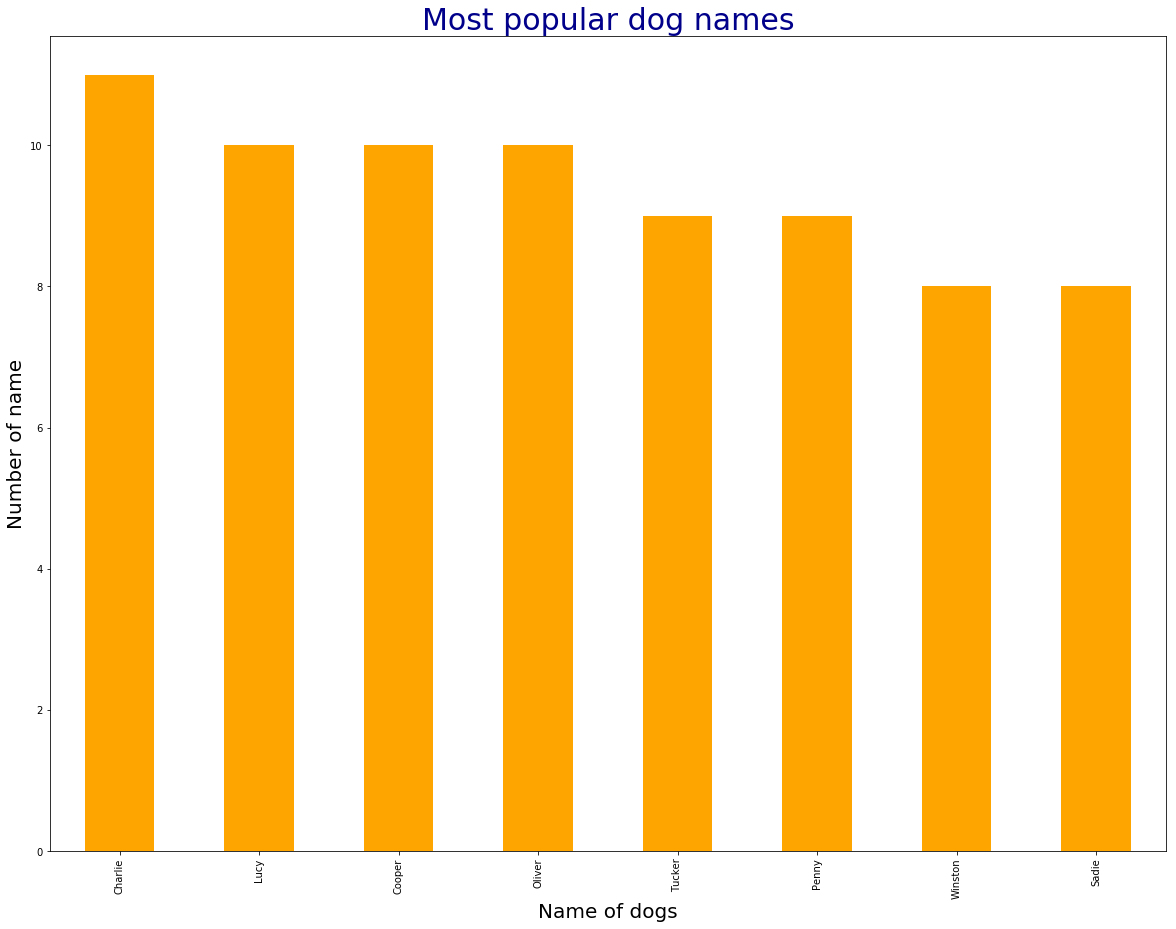

In [46]:
most_popular_name.plot(kind='bar', color='orange', figsize=(20, 15))
plt.title('Most popular dog names', size=30, color='darkblue')
plt.xlabel('Name of dogs', size=20)
plt.ylabel('Number of name', size=20)